<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/DEADPOOL/ASSIGNMENT7_POLARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 7: Comparison between libraries
#POLARS

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drshahizan/Python_EDA/blob/ef2db3544a9df7111d9209dac788aa6f8fbe4a77/assignment/ass4/hpdp/3H/feature_eng.ipynb)


### Group Members

**Group Name:** DEADPOOL

| Name                                     | Matrix Number  
| :---------------------------------------- | :-------------: |
|MUHAMMAD AMIR JAMIL BIN JAMLUS          | A21EC0202     |
| UMAR HAZIQ BIN MOHAMAD NORHISHAM | A21E0235
|KEE SHIN PEARL         | A21EC0190     |
|MUHAMMAD IZZUDDIN BIN SHABRIN           | A21EC0083   |















#Pick a Big Dataset:

---



## About the Data
The dataset comprises information sourced from three
distinct CSV files, totaling over 70 million records with 44 columns and a data size exceeding 8.0GB. Separating these files allows for systematic feature engineering without risking system crashes during the process.

LINK: [Anime Dataset 2023](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset)


Anime is a popular form of entertainment originating from Japan. It encompasses a wide range of animated TV series, movies, and OVAs (original video animations) that cater to various genres and target audiences. Anime is known for its distinctive art style, compelling storytelling, and diverse themes.

Anime covers a vast array of genres, including action, adventure, comedy, drama, romance, fantasy, sci-fi, and many more. Each genre offers unique storytelling elements and appeals to different preferences and interests among anime enthusiasts. It has gained significant popularity worldwide and has developed a dedicated and passionate fanbase. Fans of anime often engage in discussions, reviews, and rankings, contributing to the vibrant community surrounding this form of entertainment.

Due to the vast number of anime titles available, recommendations play a crucial role in helping enthusiasts discover new shows that align with their interests. Recommendation systems leverage user ratings, genres, and other factors to suggest anime series that users might enjoy based on their preferences.

# **`1.Downloading the Dataset`**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (5).json


In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d dbdmobile/myanimelist-dataset -f users-score-2023.csv


users-score-2023.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
from zipfile import ZipFile
dataset = '/content/users-score-2023.csv.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("extracted")

extracted


In [9]:
import polars as pl
import pandas as pd
import time
import psutil

# **`2.Data Preparation and Cleaning`**

###**Loading the dataset**

In [10]:
csv_file_path = '/content/users-score-2023.csv'

# Measure time taken for loading
start_time = time.time()
pol_df = pl.read_csv(csv_file_path)
pol_df
end_time = time.time()
loading_time = end_time - start_time

# Measure memory usage
process = psutil.Process()
initial_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken to load the dataset: {loading_time:.2f} seconds")
print(f"Memory usage: {process.memory_info().rss / (1024 ** 2) - initial_memory:.2f} MB")

Time taken to load the dataset: 10.74 seconds
Memory usage: 0.00 MB


###**Explore the number of rows & columns, ranges of values etc.**

In [11]:
start_time = time.time()
print("Number of rows:", pol_df.shape[0])
print("Number of columns:", pol_df.shape[1])

end_time = time.time()
exploration_time = end_time - start_time

process = psutil.Process()
exploration_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for exploration: {exploration_time:.2f} seconds")
print(f"Memory usage after exploration: {exploration_memory:.2f} MB")

Number of rows: 24325191
Number of columns: 5
Time taken for exploration: 0.00 seconds
Memory usage after exploration: 1869.20 MB


In [12]:
start_time = time.time()
print("Range of dataset:", pol_df.describe())

end_time = time.time()
desc_time = end_time - start_time

process = psutil.Process()
desc_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {desc_time:.2f} seconds")
print(f"Memory usage after desc: {desc_memory:.2f} MB")

Range of dataset: shape: (9, 6)
┌────────────┬───────────────┬────────────┬──────────────┬──────────────┬─────────────┐
│ describe   ┆ user_id       ┆ Username   ┆ anime_id     ┆ Anime Title  ┆ rating      │
│ ---        ┆ ---           ┆ ---        ┆ ---          ┆ ---          ┆ ---         │
│ str        ┆ f64           ┆ str        ┆ f64          ┆ str          ┆ f64         │
╞════════════╪═══════════════╪════════════╪══════════════╪══════════════╪═════════════╡
│ count      ┆ 2.4325191e7   ┆ 24325191   ┆ 2.4325191e7  ┆ 24325191     ┆ 2.4325191e7 │
│ null_count ┆ 0.0           ┆ 0          ┆ 0.0          ┆ 0            ┆ 0.0         │
│ mean       ┆ 440384.273792 ┆ null       ┆ 9754.686306  ┆ null         ┆ 7.62293     │
│ std        ┆ 366946.885299 ┆ null       ┆ 12061.964645 ┆ null         ┆ 1.66151     │
│ min        ┆ 1.0           ┆ -------    ┆ 1.0          ┆ !NVADE SHOW! ┆ 1.0         │
│ max        ┆ 1.291097e6    ┆ zzzzzombie ┆ 56085.0      ┆ ◯            ┆ 10.0        │


###**Handle missing, incorrect and invalid data**

In [13]:
null_counts = pol_df.null_count()

print("Number of null values in each column:")
print(null_counts)


Number of null values in each column:
shape: (1, 5)
┌─────────┬──────────┬──────────┬─────────────┬────────┐
│ user_id ┆ Username ┆ anime_id ┆ Anime Title ┆ rating │
│ ---     ┆ ---      ┆ ---      ┆ ---         ┆ ---    │
│ u32     ┆ u32      ┆ u32      ┆ u32         ┆ u32    │
╞═════════╪══════════╪══════════╪═════════════╪════════╡
│ 0       ┆ 0        ┆ 0        ┆ 0           ┆ 0      │
└─────────┴──────────┴──────────┴─────────────┴────────┘


In [14]:
start_time = time.time()

pol_df = pol_df.filter(pl.col("Username").is_not_null())
pol_df = pol_df.filter(pl.col("anime_id").is_not_null())
pol_df = pol_df.filter(pl.col("Anime Title").is_not_null())
pol_df = pol_df.filter(pl.col("rating").is_not_null())


end_time = time.time()
dronpna_time = end_time - start_time

process = psutil.Process()
dropna_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {dronpna_time:.2f} seconds")
print(f"Memory usage after desc: {dropna_memory:.2f} MB")

Time taken for desc: 0.02 seconds
Memory usage after desc: 1873.62 MB


In [15]:
pol_df.head()

user_id,Username,anime_id,Anime Title,rating
i64,str,i64,str,i64
1,"""Xinil""",21,"""One Piece""",9
1,"""Xinil""",48,""".hack//Sign""",7
1,"""Xinil""",320,"""A Kite""",5
1,"""Xinil""",49,"""Aa! Megami-sam…",8
1,"""Xinil""",304,"""Aa! Megami-sam…",8


###**Perform any additional steps**

In [16]:
pol_df

user_id,Username,anime_id,Anime Title,rating
i64,str,i64,str,i64
1,"""Xinil""",21,"""One Piece""",9
1,"""Xinil""",48,""".hack//Sign""",7
1,"""Xinil""",320,"""A Kite""",5
1,"""Xinil""",49,"""Aa! Megami-sam…",8
1,"""Xinil""",304,"""Aa! Megami-sam…",8
1,"""Xinil""",306,"""Abenobashi Mah…",8
1,"""Xinil""",53,"""Ai Yori Aoshi""",7
1,"""Xinil""",47,"""Akira""",5
1,"""Xinil""",591,"""Amaenaide yo!!…",6


In [17]:
start_time = time.time()


pol_df.with_columns([

    pl.col('rating').mean().alias('average_rating')
]).head()
print(pol_df)


end_time = time.time()
newcol_time = end_time - start_time

process = psutil.Process()
newcol_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {newcol_time:.2f} seconds")
print(f"Memory usage after desc: {newcol_memory:.2f} MB")

shape: (24_325_191, 5)
┌─────────┬────────────┬──────────┬──────────────────┬────────┐
│ user_id ┆ Username   ┆ anime_id ┆ Anime Title      ┆ rating │
│ ---     ┆ ---        ┆ ---      ┆ ---              ┆ ---    │
│ i64     ┆ str        ┆ i64      ┆ str              ┆ i64    │
╞═════════╪════════════╪══════════╪══════════════════╪════════╡
│ 1       ┆ Xinil      ┆ 21       ┆ One Piece        ┆ 9      │
│ 1       ┆ Xinil      ┆ 48       ┆ .hack//Sign      ┆ 7      │
│ 1       ┆ Xinil      ┆ 320      ┆ A Kite           ┆ 5      │
│ 1       ┆ Xinil      ┆ 49       ┆ Aa! Megami-sama! ┆ 8      │
│ …       ┆ …          ┆ …        ┆ …                ┆ …      │
│ 1291087 ┆ Oblongata  ┆ 174      ┆ Tenjou Tenge     ┆ 6      │
│ 1291097 ┆ JuunanaSai ┆ 1535     ┆ Death Note       ┆ 9      │
│ 1291097 ┆ JuunanaSai ┆ 226      ┆ Elfen Lied       ┆ 10     │
│ 1291097 ┆ JuunanaSai ┆ 8425     ┆ Gosick           ┆ 10     │
└─────────┴────────────┴──────────┴──────────────────┴────────┘
Time taken for de

In [18]:
start_time = time.time()

print(pol_df.groupby('Anime Title' , maintain_order = True).agg([]))


end_time = time.time()
groupby_time = end_time - start_time

process = psutil.Process()
groupby_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {groupby_time:.2f} seconds")
print(f"Memory usage after desc: {groupby_memory:.2f} MB")

shape: (16_611, 1)
┌───────────────────────────────────┐
│ Anime Title                       │
│ ---                               │
│ str                               │
╞═══════════════════════════════════╡
│ One Piece                         │
│ .hack//Sign                       │
│ A Kite                            │
│ Aa! Megami-sama!                  │
│ …                                 │
│ King of Prism: Shiny Seven Stars… │
│ Sekai Monoshiri Ryoko             │
│ Yousei Dick                       │
│ Shengsi Huifang                   │
└───────────────────────────────────┘
Time taken for desc: 2.81 seconds
Memory usage after desc: 1997.38 MB


# **`3.Exploratory Analysis and Visualization`**

In [19]:
!pip install polars plotly


In [20]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
start_time = time.time()

pan_df = pol_df.to_pandas()


end_time = time.time()
conv_time = end_time - start_time

process = psutil.Process()
conv_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {conv_time:.2f} seconds")
print(f"Memory usage after desc: {conv_memory:.2f} MB")

Time taken for desc: 16.25 seconds
Memory usage after desc: 3011.65 MB


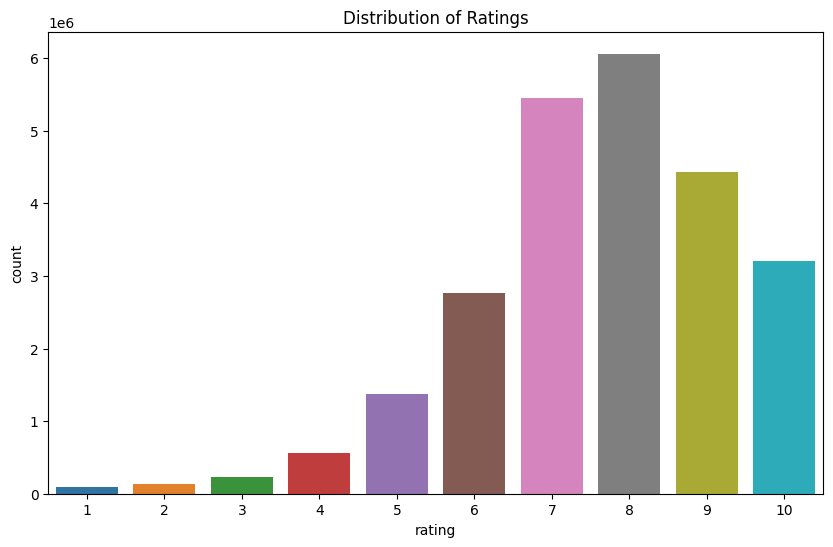

Time taken for desc: 7.18 seconds
Memory usage after desc: 3314.62 MB


In [22]:
start_time = time.time()

plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=pan_df)
plt.title('Distribution of Ratings')
plt.show()

end_time = time.time()
one_time = end_time - start_time
process = psutil.Process()
one_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {one_time:.2f} seconds")
print(f"Memory usage after desc: {one_memory:.2f} MB")

In [23]:
start_time = time.time()

grouped_df = pol_df.groupby('Anime Title').agg(pl.col('rating').mean().alias('average_rating'))
top_rated_anime = grouped_df.sort('average_rating', descending=True).head(10)
print('Top 10 Rated Anime Titles:')
print(top_rated_anime)

end_time = time.time()
two_time = end_time - start_time
process = psutil.Process()
two_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {two_time:.2f} seconds")
print(f"Memory usage after desc: {two_memory:.2f} MB")

Top 10 Rated Anime Titles:
shape: (10, 2)
┌───────────────────────────────────┬────────────────┐
│ Anime Title                       ┆ average_rating │
│ ---                               ┆ ---            │
│ str                               ┆ f64            │
╞═══════════════════════════════════╪════════════════╡
│ Umiyuri Kaiteitan                 ┆ 10.0           │
│ Starry Regrets                    ┆ 10.0           │
│ Neo-Neon                          ┆ 10.0           │
│ Iiwake Love Song                  ┆ 10.0           │
│ …                                 ┆ …              │
│ Oshiri Mae Man                    ┆ 10.0           │
│ Pastel Tea Time                   ┆ 10.0           │
│ Sagashimono                       ┆ 10.0           │
│ Sore Ike! Anpanman: Yuurei Sen w… ┆ 10.0           │
└───────────────────────────────────┴────────────────┘
Time taken for desc: 8.49 seconds
Memory usage after desc: 3252.99 MB


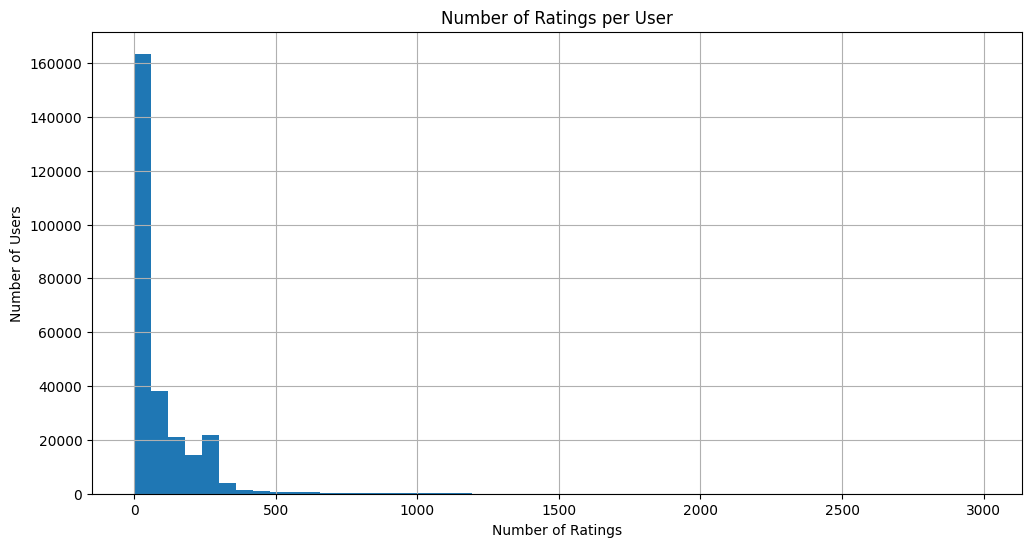

Time taken for desc: 2.06 seconds
Memory usage after desc: 3254.98 MB


In [24]:
start_time = time.time()


ratings_per_user = pan_df.groupby('user_id')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ratings_per_user.hist(bins=50)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


end_time = time.time()
three_time = end_time - start_time
process = psutil.Process()
three_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {three_time:.2f} seconds")
print(f"Memory usage after desc: {three_memory:.2f} MB")

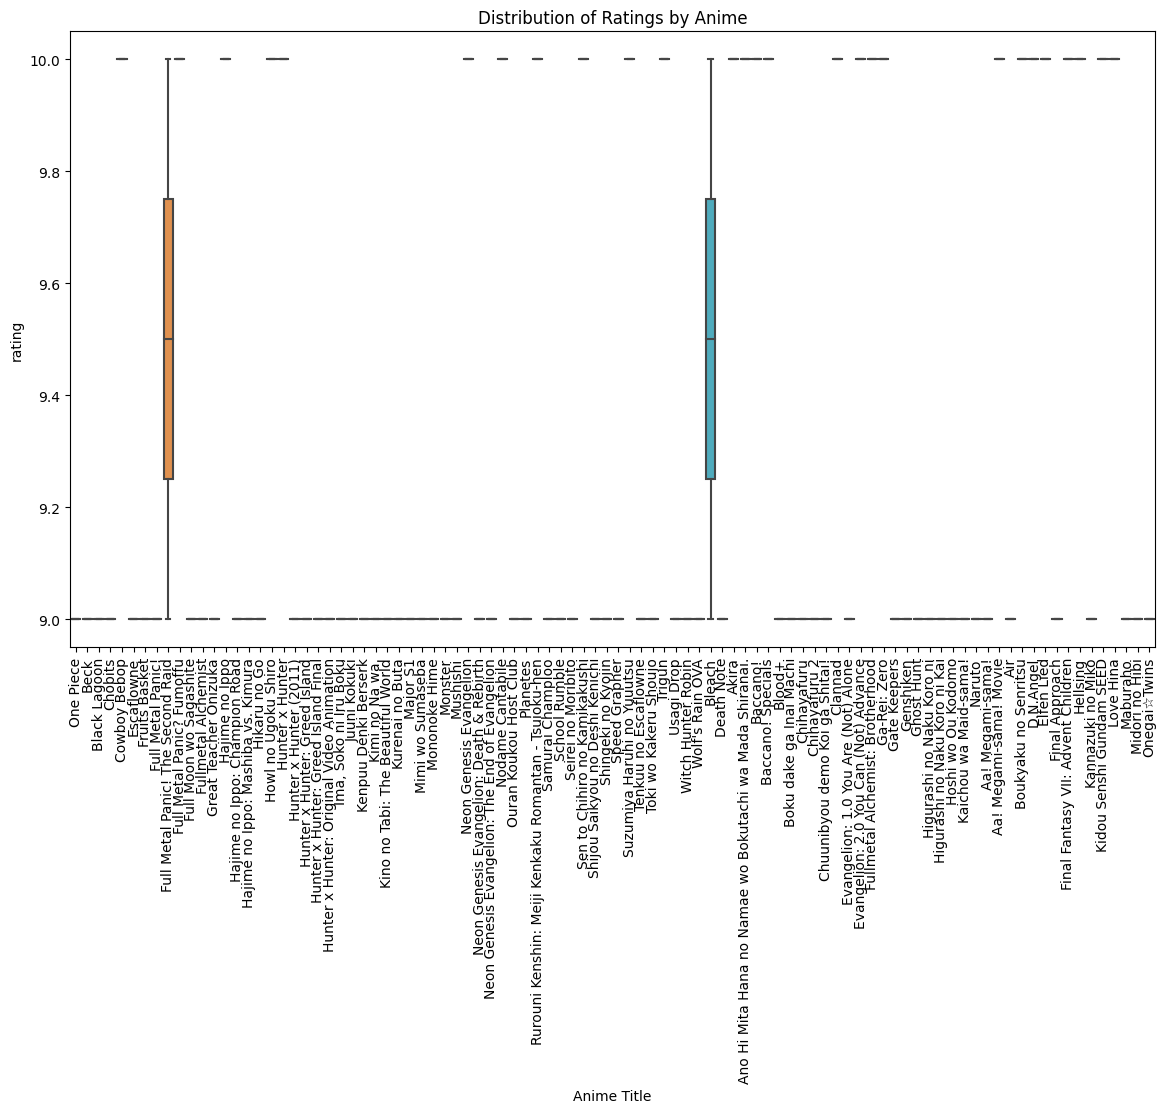

In [25]:
start_time = time.time()


filtered_df = pan_df[pan_df['rating'] >= 9].head(100)

plt.figure(figsize=(14, 8))
sns.boxplot(x='Anime Title', y='rating' , data=filtered_df)
plt.title('Distribution of Ratings by Anime')
plt.xticks(rotation=90)
plt.show()

end_time = time.time()
four_time = end_time - start_time
process = psutil.Process()
four_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {four_time:.2f} seconds")
print(f"Memory usage after desc: {four_memory:.2f} MB")

In [26]:
start_time = time.time()

unique_users = pol_df['user_id'].n_unique()
unique_anime = pol_df['anime_id'].n_unique()


print(f'Number of Unique Users: {unique_users}')
print(f'Number of Unique Anime: {unique_anime}')

end_time = time.time()
five_time = end_time - start_time
process = psutil.Process()
five_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {five_time:.2f} seconds")
print(f"Memory usage after desc: {five_memory:.2f} MB")

Time taken for desc: 5.33 seconds
Memory usage after desc: 3612.20 MB
Number of Unique Users: 270033
Number of Unique Anime: 16500
Time taken for desc: 1.70 seconds
Memory usage after desc: 3612.52 MB


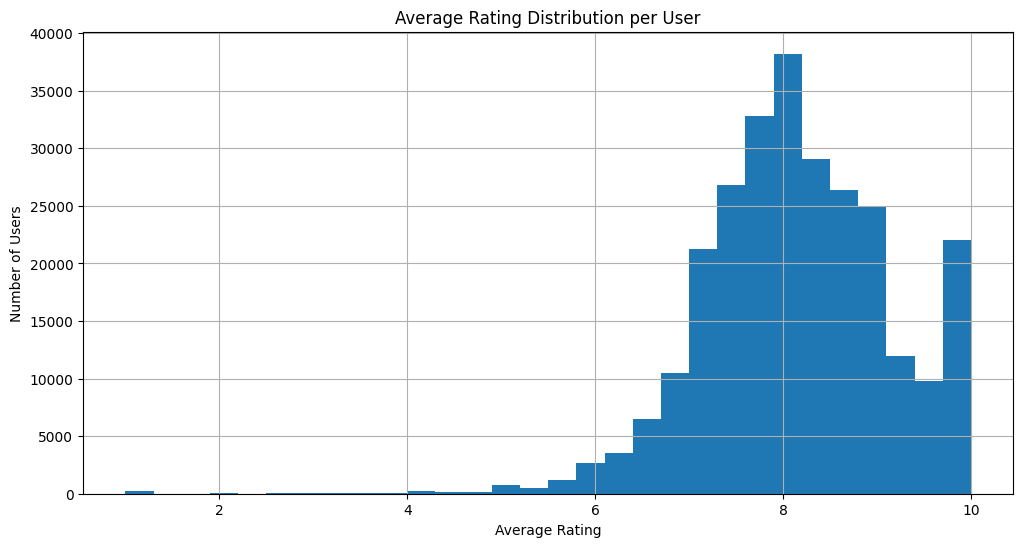

Time taken for desc: 1.57 seconds
Memory usage after desc: 3714.53 MB


In [27]:
start_time = time.time()

average_ratings_per_user = pol_df.groupby('user_id').agg(pl.col('rating').mean().alias('average_rating'))

average_ratings_df = average_ratings_per_user.to_pandas()

plt.figure(figsize=(12, 6))
average_ratings_df['average_rating'].hist(bins=30)
plt.title('Average Rating Distribution per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

end_time = time.time()
six_time = end_time - start_time
process = psutil.Process()
six_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {six_time:.2f} seconds")
print(f"Memory usage after desc: {six_memory:.2f} MB")

In [28]:

start_time = time.time()

most_rated_anime_lazy = pol_df.groupby('Anime Title').agg(pl.col('rating').mean().alias('average_rating'))

most_rated_anime = most_rated_anime_lazy.sort("average_rating").head(10)

print('Top 10 Most Rated Anime Titles:')
print(most_rated_anime)

end_time = time.time()
eight_time = end_time - start_time
process = psutil.Process()
eight_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {eight_time:.2f} seconds")
print(f"Memory usage after desc: {eight_memory:.2f} MB")

Top 10 Most Rated Anime Titles:
shape: (10, 2)
┌───────────────────────────────────┬────────────────┐
│ Anime Title                       ┆ average_rating │
│ ---                               ┆ ---            │
│ str                               ┆ f64            │
╞═══════════════════════════════════╪════════════════╡
│ Jah Jhaka                         ┆ 1.0            │
│ Ao Fei Q Chong                    ┆ 1.0            │
│ Hazedon                           ┆ 1.0            │
│ Miraesonyeon Kunta Beomyuda 5000… ┆ 1.0            │
│ …                                 ┆ …              │
│ Congming de Yixiu Zhi Fan Dou Go… ┆ 1.0            │
│ Goesu Daejeonjaeng                ┆ 1.0            │
│ Me wo Samase Toragorou            ┆ 1.0            │
│ Arigatou Kumanofu                 ┆ 1.0            │
└───────────────────────────────────┴────────────────┘
Time taken for desc: 4.60 seconds
Memory usage after desc: 3673.49 MB


In [29]:
start_time = time.time()

avg_user_rating = pol_df.groupby('user_id').agg(pl.col('rating').mean().alias('average_user_rating'))
pol_df = pol_df.join(avg_user_rating, on='user_id', how='left')

print(pol_df)

end_time = time.time()
nine_time = end_time - start_time
process = psutil.Process()
nine_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {nine_time:.2f} seconds")
print(f"Memory usage after desc: {nine_memory:.2f} MB")

shape: (24_325_191, 6)
┌─────────┬────────────┬──────────┬──────────────────┬────────┬─────────────────────┐
│ user_id ┆ Username   ┆ anime_id ┆ Anime Title      ┆ rating ┆ average_user_rating │
│ ---     ┆ ---        ┆ ---      ┆ ---              ┆ ---    ┆ ---                 │
│ i64     ┆ str        ┆ i64      ┆ str              ┆ i64    ┆ f64                 │
╞═════════╪════════════╪══════════╪══════════════════╪════════╪═════════════════════╡
│ 1       ┆ Xinil      ┆ 21       ┆ One Piece        ┆ 9      ┆ 7.438931            │
│ 1       ┆ Xinil      ┆ 48       ┆ .hack//Sign      ┆ 7      ┆ 7.438931            │
│ 1       ┆ Xinil      ┆ 320      ┆ A Kite           ┆ 5      ┆ 7.438931            │
│ 1       ┆ Xinil      ┆ 49       ┆ Aa! Megami-sama! ┆ 8      ┆ 7.438931            │
│ …       ┆ …          ┆ …        ┆ …                ┆ …      ┆ …                   │
│ 1291087 ┆ Oblongata  ┆ 174      ┆ Tenjou Tenge     ┆ 6      ┆ 7.533333            │
│ 1291097 ┆ JuunanaSai ┆ 1535  

In [30]:
start_time = time.time()

avg_anime_rating = pol_df.groupby('anime_id').agg(pl.col('rating').mean().alias('average_anime_rating'))

pol_df = pol_df.join(avg_anime_rating, on='anime_id', how='left')

print(pol_df)

end_time = time.time()
ten_time = end_time - start_time
process = psutil.Process()
ten_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {ten_time:.2f} seconds")
print(f"Memory usage after desc: {ten_memory:.2f} MB")

shape: (24_325_191, 7)
┌─────────┬────────────┬──────────┬──────────────┬────────┬────────────────────┬───────────────────┐
│ user_id ┆ Username   ┆ anime_id ┆ Anime Title  ┆ rating ┆ average_user_ratin ┆ average_anime_rat │
│ ---     ┆ ---        ┆ ---      ┆ ---          ┆ ---    ┆ g                  ┆ ing               │
│ i64     ┆ str        ┆ i64      ┆ str          ┆ i64    ┆ ---                ┆ ---               │
│         ┆            ┆          ┆              ┆        ┆ f64                ┆ f64               │
╞═════════╪════════════╪══════════╪══════════════╪════════╪════════════════════╪═══════════════════╡
│ 1       ┆ Xinil      ┆ 21       ┆ One Piece    ┆ 9      ┆ 7.438931           ┆ 8.648615          │
│ 1       ┆ Xinil      ┆ 48       ┆ .hack//Sign  ┆ 7      ┆ 7.438931           ┆ 7.161328          │
│ 1       ┆ Xinil      ┆ 320      ┆ A Kite       ┆ 5      ┆ 7.438931           ┆ 6.794514          │
│ 1       ┆ Xinil      ┆ 49       ┆ Aa!          ┆ 8      ┆ 7.438931

In [31]:
start_time = time.time()

num_ratings_anime = pol_df.groupby('anime_id').agg(pl.col('rating').mean().alias('num_rating_anime'))
pol_df = pol_df.join(num_ratings_anime, on='anime_id', how='left')

print(pol_df)

end_time = time.time()
ele_time = end_time - start_time
process = psutil.Process()
ele_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {ele_time:.2f} seconds")
print(f"Memory usage after desc: {ele_memory:.2f} MB")

shape: (24_325_191, 8)
┌─────────┬────────────┬──────────┬──────────────┬────────┬────────────┬────────────┬──────────────┐
│ user_id ┆ Username   ┆ anime_id ┆ Anime Title  ┆ rating ┆ average_us ┆ average_an ┆ num_rating_a │
│ ---     ┆ ---        ┆ ---      ┆ ---          ┆ ---    ┆ er_rating  ┆ ime_rating ┆ nime         │
│ i64     ┆ str        ┆ i64      ┆ str          ┆ i64    ┆ ---        ┆ ---        ┆ ---          │
│         ┆            ┆          ┆              ┆        ┆ f64        ┆ f64        ┆ f64          │
╞═════════╪════════════╪══════════╪══════════════╪════════╪════════════╪════════════╪══════════════╡
│ 1       ┆ Xinil      ┆ 21       ┆ One Piece    ┆ 9      ┆ 7.438931   ┆ 8.648615   ┆ 8.648615     │
│ 1       ┆ Xinil      ┆ 48       ┆ .hack//Sign  ┆ 7      ┆ 7.438931   ┆ 7.161328   ┆ 7.161328     │
│ 1       ┆ Xinil      ┆ 320      ┆ A Kite       ┆ 5      ┆ 7.438931   ┆ 6.794514   ┆ 6.794514     │
│ 1       ┆ Xinil      ┆ 49       ┆ Aa!          ┆ 8      ┆ 7.438931

In [32]:


start_time = time.time()

pol_df = pol_df.select(
    pl.col('*'),
    (pl.col('rating') - pl.col('average_user_rating')).alias('rating_deviation_user')
)

print(pol_df)

end_time = time.time()
twe_time = end_time - start_time
process = psutil.Process()
twe_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {twe_time:.2f} seconds")
print(f"Memory usage after desc: {twe_memory:.2f} MB")

shape: (24_325_191, 9)
┌─────────┬─────────┬──────────┬───────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ user_id ┆ Usernam ┆ anime_id ┆ Anime     ┆ … ┆ average_us ┆ average_an ┆ num_rating ┆ rating_dev │
│ ---     ┆ e       ┆ ---      ┆ Title     ┆   ┆ er_rating  ┆ ime_rating ┆ _anime     ┆ iation_use │
│ i64     ┆ ---     ┆ i64      ┆ ---       ┆   ┆ ---        ┆ ---        ┆ ---        ┆ r          │
│         ┆ str     ┆          ┆ str       ┆   ┆ f64        ┆ f64        ┆ f64        ┆ ---        │
│         ┆         ┆          ┆           ┆   ┆            ┆            ┆            ┆ f64        │
╞═════════╪═════════╪══════════╪═══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 1       ┆ Xinil   ┆ 21       ┆ One Piece ┆ … ┆ 7.438931   ┆ 8.648615   ┆ 8.648615   ┆ 1.561069   │
│ 1       ┆ Xinil   ┆ 48       ┆ .hack//Si ┆ … ┆ 7.438931   ┆ 7.161328   ┆ 7.161328   ┆ -0.438931  │
│         ┆         ┆          ┆ gn        ┆   ┆            ┆       

In [33]:

start_time = time.time()

bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
pan_df['rating_category'] = pd.cut(pan_df['rating'], bins=bins, labels=labels)
print(pan_df)

end_time = time.time()
thir_time = end_time - start_time
process = psutil.Process()
thir_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {thir_time:.2f} seconds")
print(f"Memory usage after desc: {thir_memory:.2f} MB")

          user_id    Username  anime_id             Anime Title  rating  \
0               1       Xinil        21               One Piece       9   
1               1       Xinil        48             .hack//Sign       7   
2               1       Xinil       320                  A Kite       5   
3               1       Xinil        49        Aa! Megami-sama!       8   
4               1       Xinil       304  Aa! Megami-sama! Movie       8   
...           ...         ...       ...                     ...     ...   
24325186  1291087   Oblongata     10611                    R-15       3   
24325187  1291087   Oblongata       174            Tenjou Tenge       6   
24325188  1291097  JuunanaSai      1535              Death Note       9   
24325189  1291097  JuunanaSai       226              Elfen Lied      10   
24325190  1291097  JuunanaSai      8425                  Gosick      10   

         rating_category  
0                   High  
1                 Medium  
2                 

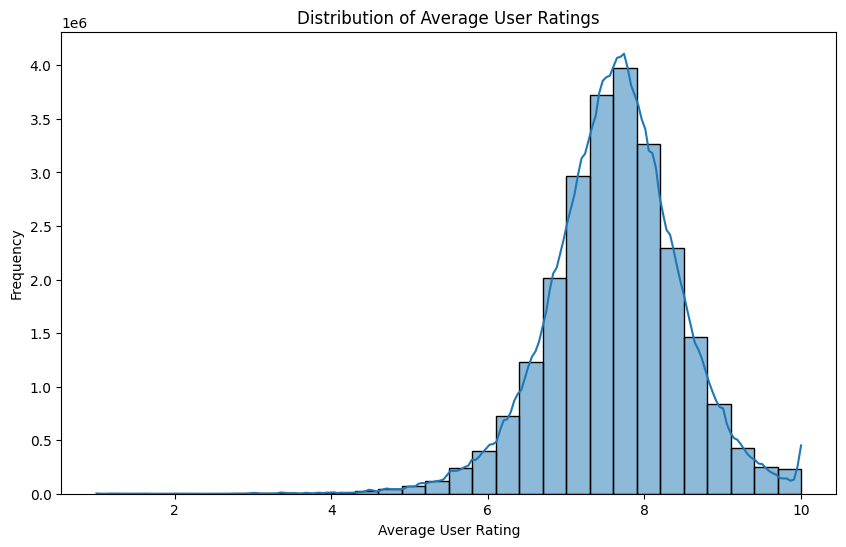

Time taken for desc: 149.91 seconds
Memory usage after desc: 6123.61 MB


In [37]:
start_time = time.time()

plt.figure(figsize=(10, 6))
sns.histplot(pan_df['average_user_rating'], bins=30, kde=True)
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average User Rating')
plt.ylabel('Frequency')
plt.show()

end_time = time.time()
fourt_time = end_time - start_time
process = psutil.Process()
fourt_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {fourt_time:.2f} seconds")
print(f"Memory usage after desc: {fourt_memory:.2f} MB")

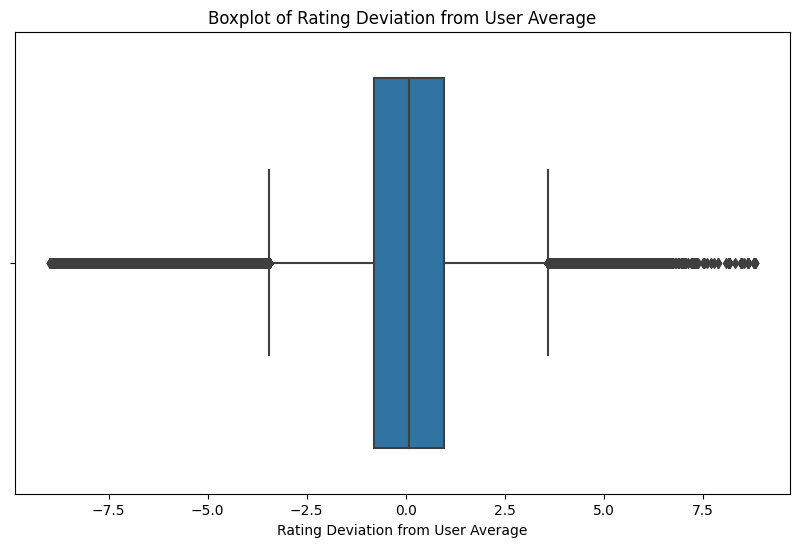

Time taken for desc: 2.91 seconds
Memory usage after desc: 6123.87 MB


In [38]:
start_time = time.time()

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_deviation_user', data=pan_df)
plt.title('Boxplot of Rating Deviation from User Average')
plt.xlabel('Rating Deviation from User Average')
plt.show()

end_time = time.time()
fift_time = end_time - start_time
process = psutil.Process()
fift_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {fift_time:.2f} seconds")
print(f"Memory usage after desc: {fift_memory:.2f} MB")

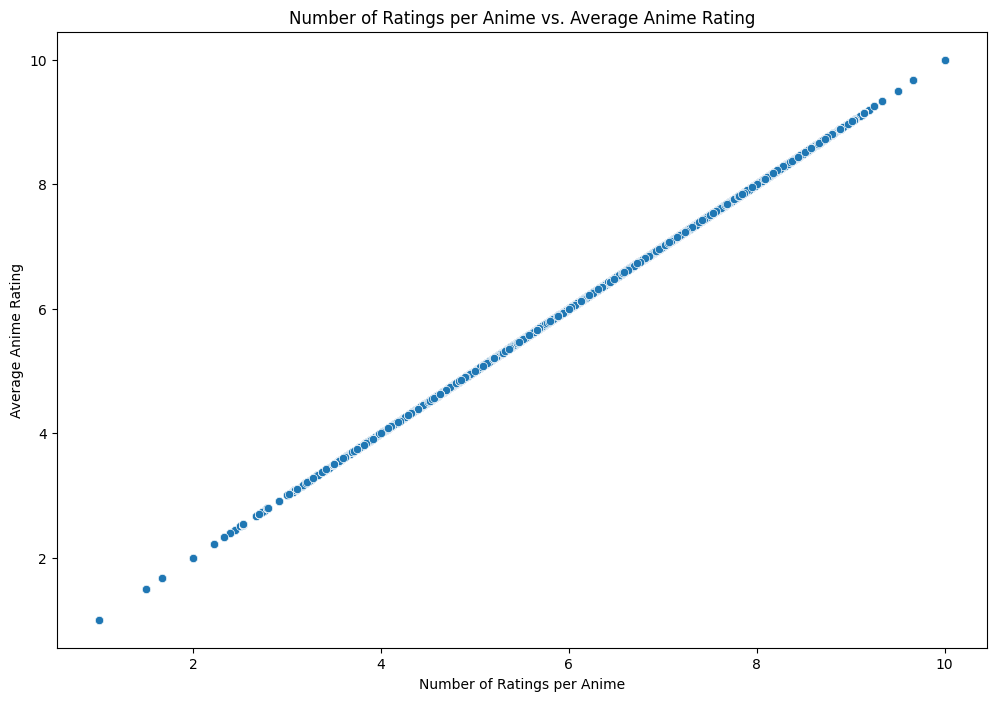

Time taken for desc: 60.47 seconds
Memory usage after desc: 7423.14 MB


In [39]:
start_time = time.time()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='num_rating_anime', y='average_anime_rating', data=pan_df)
plt.title('Number of Ratings per Anime vs. Average Anime Rating')
plt.xlabel('Number of Ratings per Anime')
plt.ylabel('Average Anime Rating')
plt.show()

end_time = time.time()
sixt_time = end_time - start_time
process = psutil.Process()
sixt_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {sixt_time:.2f} seconds")
print(f"Memory usage after desc: {sixt_memory:.2f} MB")

# Asking and Answering Questions



*   Ask at least 5 interesting questions about your dataset
*   Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
*  Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
*  Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


1. What are the top-rated anime titles?





---





Answer: Compute the average rating for each anime title and display the top-rated ones.

In [41]:
start_time = time.time()

top_anime = pol_df.groupby('Anime Title').agg(pl.col('rating').mean().alias('average_user_rating'))

print(top_anime)
end_time = time.time()
a_time = end_time - start_time
process = psutil.Process()
a_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {a_time:.2f} seconds")
print(f"Memory usage after desc: {a_memory:.2f} MB")

shape: (16_611, 2)
┌───────────────────────────────────┬─────────────────────┐
│ Anime Title                       ┆ average_user_rating │
│ ---                               ┆ ---                 │
│ str                               ┆ f64                 │
╞═══════════════════════════════════╪═════════════════════╡
│ Nobunagun                         ┆ 6.683877            │
│ Prison School                     ┆ 7.778695            │
│ First Love                        ┆ 6.662983            │
│ Youxia Zhanji                     ┆ 8.5                 │
│ …                                 ┆ …                   │
│ Bokura Mada Underground (2022)    ┆ 6.3                 │
│ Yes ka No ka Hanbun ka            ┆ 7.115702            │
│ 30-pun de Wakaru! Kore made no L… ┆ 5.894737            │
│ Fate/kaleid liner Prisma☆Illya 2… ┆ 6.911909            │
└───────────────────────────────────┴─────────────────────┘
Time taken for desc: 5.23 seconds
Memory usage after desc: 7391.18 MB


2. How many unique users and anime titles are in the dataset?


---



Answer: Calculate the number of unique users and unique anime titles.

In [42]:
start_time = time.time()

unique_users = pol_df['user_id'].n_unique()
unique_anime_titles = pol_df['Anime Title'].n_unique()

print(f"Unique Users: {unique_users}")
print(f"Unique Anime Titles: {unique_anime_titles}")

end_time = time.time()
b_time = end_time - start_time
process = psutil.Process()
b_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {b_time:.2f} seconds")
print(f"Memory usage after desc: {b_memory:.2f} MB")

Unique Users: 270033
Unique Anime Titles: 16611
Time taken for desc: 7.22 seconds
Memory usage after desc: 7391.25 MB


3. What is the distribution of ratings given by users?


---



Answer: Visualize the distribution of ratings using a histogram.

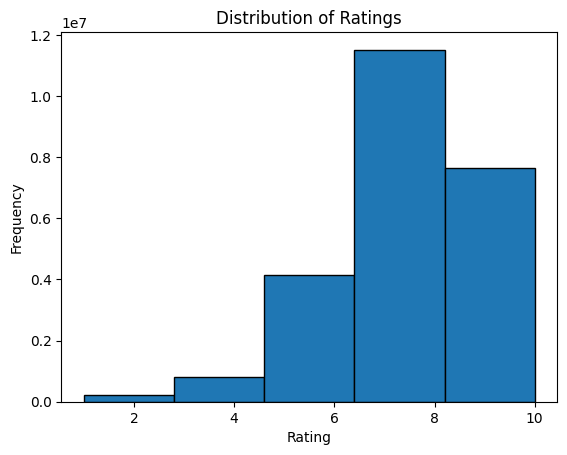

Time taken for desc: 2.62 seconds
Memory usage after desc: 5536.04 MB


In [44]:

start_time = time.time()

plt.hist(pan_df['rating'], bins=5, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

end_time = time.time()
c_time = end_time - start_time
process = psutil.Process()
c_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {c_time:.2f} seconds")
print(f"Memory usage after desc: {c_memory:.2f} MB")

4. Who are the top users with the most rated anime?

---



Answer: Identify and display the users who have rated the most anime.

In [45]:
start_time = time.time()

top_users = pol_df['user_id'].value_counts().head(10)

print(top_users)

end_time = time.time()
d_time = end_time - start_time
process = psutil.Process()
d_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {d_time:.2f} seconds")
print(f"Memory usage after desc: {d_memory:.2f} MB")

shape: (10, 2)
┌─────────┬────────┐
│ user_id ┆ counts │
│ ---     ┆ ---    │
│ i64     ┆ u32    │
╞═════════╪════════╡
│ 486730  ┆ 30     │
│ 372526  ┆ 1      │
│ 301582  ┆ 15     │
│ 20204   ┆ 388    │
│ …       ┆ …      │
│ 437528  ┆ 300    │
│ 307224  ┆ 7      │
│ 44866   ┆ 9      │
│ 397960  ┆ 64     │
└─────────┴────────┘
Time taken for desc: 0.66 seconds
Memory usage after desc: 5639.18 MB


5. How many users have rated the same anime title?

---



Answer: Find the distribution of the number of ratings given by users for each anime title.

In [47]:
start_time = time.time()

ratings_per_anime = pol_df.groupby('Anime Title').agg(pl.col('rating').mean().alias('num_rating_anime'))
print(ratings_per_anime.describe())

end_time = time.time()
e_time = end_time - start_time
process = psutil.Process()
e_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {e_time:.2f} seconds")
print(f"Memory usage after desc: {e_memory:.2f} MB")

shape: (9, 3)
┌────────────┬──────────────┬──────────────────┐
│ describe   ┆ Anime Title  ┆ num_rating_anime │
│ ---        ┆ ---          ┆ ---              │
│ str        ┆ str          ┆ f64              │
╞════════════╪══════════════╪══════════════════╡
│ count      ┆ 16611        ┆ 16611.0          │
│ null_count ┆ 0            ┆ 0.0              │
│ mean       ┆ null         ┆ 6.564904         │
│ std        ┆ null         ┆ 1.164886         │
│ min        ┆ !NVADE SHOW! ┆ 1.0              │
│ max        ┆ ◯            ┆ 10.0             │
│ median     ┆ null         ┆ 6.685714         │
│ 25%        ┆ null         ┆ 6.0              │
│ 75%        ┆ null         ┆ 7.308411         │
└────────────┴──────────────┴──────────────────┘
Time taken for desc: 3.23 seconds
Memory usage after desc: 5544.33 MB


6. What is the average rating given by each user?

---



 Answer: Calculate the average rating provided by each user.

In [49]:
start_time = time.time()

avg_rating_per_user = pol_df.groupby('user_id').agg(pl.col('rating').mean().alias('num_rating_anime'))
print(avg_rating_per_user.head(10))

end_time = time.time()
f_time = end_time - start_time
process = psutil.Process()
f_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {f_time:.2f} seconds")
print(f"Memory usage after desc: {f_memory:.2f} MB")

shape: (10, 2)
┌─────────┬──────────────────┐
│ user_id ┆ num_rating_anime │
│ ---     ┆ ---              │
│ i64     ┆ f64              │
╞═════════╪══════════════════╡
│ 77136   ┆ 7.9              │
│ 23898   ┆ 6.910035         │
│ 18882   ┆ 9.333333         │
│ 391820  ┆ 10.0             │
│ …       ┆ …                │
│ 82480   ┆ 7.176471         │
│ 404080  ┆ 8.318182         │
│ 406354  ┆ 7.109244         │
│ 38134   ┆ 7.288462         │
└─────────┴──────────────────┘
Time taken for desc: 1.80 seconds
Memory usage after desc: 5628.73 MB


7. Is there a correlation between the number of ratings an anime has and its average rating?

---



 Answer: Explore if popular anime titles tend to have higher or lower average ratings.

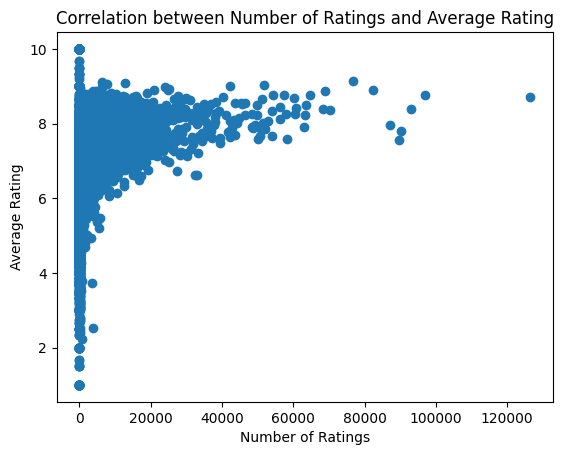

Time taken for desc: 10.23 seconds
Memory usage after desc: 5637.08 MB


In [51]:
start_time = time.time()


anime_stats = pan_df.groupby('Anime Title').agg({'user_id': 'count', 'rating': 'mean'})
plt.scatter(anime_stats['user_id'], anime_stats['rating'])
plt.title('Correlation between Number of Ratings and Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

end_time = time.time()
g_time = end_time - start_time
process = psutil.Process()
g_memory = process.memory_info().rss / (1024 ** 2)

print(f"Time taken for desc: {g_time:.2f} seconds")
print(f"Memory usage after desc: {g_memory:.2f} MB")

#Conclusion


---



# Conclusion for Polars:

In handling large datasets efficiently, Polars emerges as a powerful alternative to traditional data manipulation libraries, such as Pandas. Leveraging the unique features of Polars offers distinct advantages, while still requiring a thoughtful consideration of potential limitations.

## Advantages of Polars:

### Performance and Parallelization:

- Polars excels in performance by leveraging Rust implementation and parallel processing capabilities.
- Operations are optimized for speed, making it well-suited for handling large datasets efficiently.

### Distributed Computing with Arrow:

- Polars seamlessly integrates with Arrow, a cross-language in-memory columnar data representation.
- This allows for efficient data interchange between systems, enabling distributed computing scenarios for enhanced scalability.

### Lazy Evaluation:

- Polars introduces lazy evaluation, allowing for deferred computation until necessary.
- This optimizes resource utilization by avoiding unnecessary computations, resulting in faster and more responsive data processing.

### Memory Efficiency:

- Polars provides memory efficiency through its chunked processing capabilities.
- Loading and processing data in chunks help mitigate memory constraints, making it well-adapted to handle datasets that exceed available memory.

## Disadvantages and Considerations:

### Learning Curve:

- Transitioning from Pandas to Polars may involve a learning curve, as the APIs are different.
- Users familiar with Pandas may need some time to adapt to Polars' syntax and features.

### Ecosystem Maturity:

- While Polars is a promising library, its ecosystem is still evolving.
- Some functionalities and tools available in Pandas may not have direct equivalents in Polars. Users may need to explore workarounds or contribute to the growing ecosystem.

### Community and Documentation:

- As a relatively newer library compared to Pandas, Polars' community and documentation may not be as extensive.
- Users may find fewer resources and community support compared to Pandas, which has a more established user base.

## Scalability and Flexibility:

In conclusion, Polars provides a compelling solution for handling large datasets efficiently, offering performance benefits and enhanced memory management. Its integration with Arrow supports scalability in distributed computing environments. While considerations such as a learning curve and evolving ecosystem exist, Polars showcases its potential to become a go-to choice for big data processing in Python. Users can benefit from its unique features to strike a balance between computational efficiency, responsiveness, and resource utilization.


# Polars vs. Pandas: A Basic Comparison

## Polars

- **Language:** Primarily developed in Rust with Python bindings.
  
- **Performance:**
  - Optimized for speed and parallel processing.
  - Well-suited for handling large datasets efficiently.

- **Lazy Evaluation:**
  - Introduces lazy evaluation for deferred computation.
  - Enhances responsiveness and minimizes unnecessary computations.

- **Memory Efficiency:**
  - Utilizes chunked processing for efficient memory management.
  - Well-adapted for datasets exceeding available memory.

- **Integration:**
  - Seamless integration with Apache Arrow for cross-language data interchange.
  - Supports distributed computing environments.

- **Community and Ecosystem:**
  - Evolving ecosystem with a growing set of features.
  - Limited community support compared to Pandas.

## Pandas

- **Language:** Developed in Python.

- **Performance:**
  - Offers solid performance for standard data manipulations.
  - May face challenges with large datasets due to memory constraints.

- **Lazy Evaluation:**
  - Operates with immediate computation.

- **Memory Efficiency:**
  - Limited memory efficiency for very large datasets.

- **Integration:**
  - Native support for Python data structures.
  - Limited support for distributed computing.

- **Community and Ecosystem:**
  - Well-established with a large community and extensive documentation.
  - Rich ecosystem with numerous libraries built on top of Pandas.

# Main Use Cases

## Polars

- **Big Data Processing:**
  - Ideal for scenarios involving large datasets and distributed computing.
  - Provides efficient handling of data exceeding available memory.

- **Performance-Critical Applications:**
  - Suited for applications requiring high performance and parallel processing.

## Pandas

- **Exploratory Data Analysis (EDA):**
  - Well-suited for interactive data analysis and exploration.
  
- **Small to Medium-sized Datasets:**
  - Effective for datasets that fit comfortably in memory.
  
- **Rich Ecosystem:**
  - Comprehensive ecosystem with numerous libraries and tools built on Pandas.

---
